In [ ]:
print("CUDA version:")
!nvcc --version
print("cuDNN version:")
!apt list --installed | grep cudnn

CUDA version:
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
cuDNN version:


libcudnn8-dev/unknown,unknown,now 8.9.6.50-1+cuda12.2 amd64 [installed,upgradable to: 8.9.7.29-1+cuda12.2]
libcudnn8/unknown,unknown,now 8.9.6.50-1+cuda12.2 amd64 [installed,upgradable to: 8.9.7.29-1+cuda12.2]


# YOLOv8 Installation

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install ultralytics==8.0.90
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 33.6/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8s.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 21.5M/21.5M [00:00<00:00, 35.7MB/s]
2024-08-09 21:32:54.602708: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 21:32:54.620667: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 21:32:54.626678: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

100% 104k/104k [00:00<00:00, 111MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 h

/content


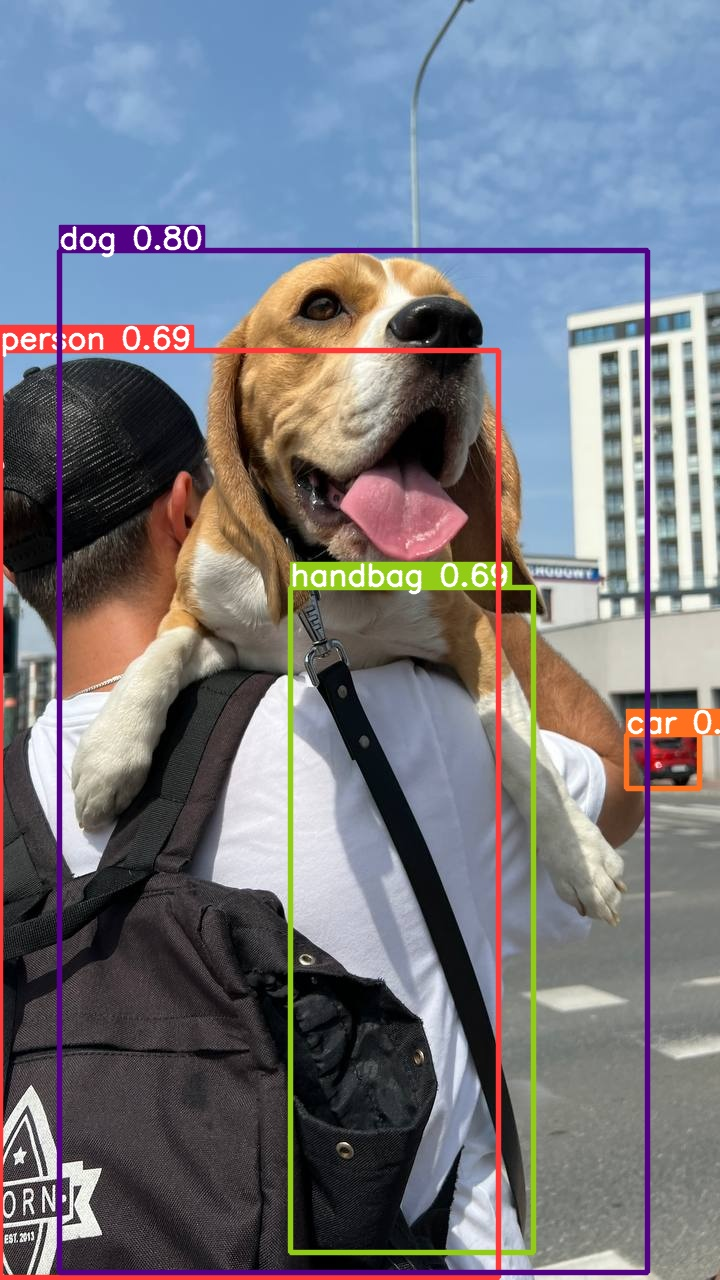

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

# Dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XsyxswdqkEg6IzstfJ2X")
project = rf.workspace("myfirstworkspace-jbsfo").project("truck-not-truck")
version = project.version(3)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.90, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Truck-Not-Truck-3 in yolov8:: 100%|██████████| 3080/3080 [00:00<00:00, 6975.59it/s]


# Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/truck-detection/data.yaml epochs=100 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.75 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/truck-detection/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnos

In [ ]:
!zip -r /content/train.zip /content/runs/detect/train

  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/val_batch1_labels.jpg (deflated 7%)
  adding: content/runs/detect/train/train_batch6932.jpg (deflated 4%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/u8u8_best.onnx (deflated 34%)
  adding: content/runs/detect/train/weights/preprocessed_best.onnx (deflated 16%)
  adding: content/runs/detect/train/weights/i8i8_best.onnx (deflated 37%)
  adding: content/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train/weights/i8u8_best.onnx (deflated 37%)
  adding: content/runs/detect/train/weights/best.onnx (deflated 16%)
  adding: content/runs/detect/train/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train/args.yaml (deflated 52%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 6%)
  adding: content/runs/detect/train/results.png (deflated 9%)
  adding: content/runs/detect/train/train_batch0.jpg

In [ ]:
!yolo detect val model=/content/runs/detect/train/weights/best.pt data=/content/datasets/truck-detection/data.yaml device=cpu imgsz=640 batch=16 conf=0.25 iou=0.6

2024-08-09 20:45:08.879672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 20:45:08.898566: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 20:45:08.904613: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 

In [ ]:
!zip -r /content/val_origin.zip /content/runs/detect/val7

  adding: content/runs/detect/val7/ (stored 0%)
  adding: content/runs/detect/val7/val_batch1_labels.jpg (deflated 6%)
  adding: content/runs/detect/val7/val_batch2_labels.jpg (deflated 7%)
  adding: content/runs/detect/val7/F1_curve.png (deflated 16%)
  adding: content/runs/detect/val7/confusion_matrix_normalized.png (deflated 32%)
  adding: content/runs/detect/val7/val_batch2_pred.jpg (deflated 6%)
  adding: content/runs/detect/val7/R_curve.png (deflated 14%)
  adding: content/runs/detect/val7/PR_curve.png (deflated 21%)
  adding: content/runs/detect/val7/confusion_matrix.png (deflated 33%)
  adding: content/runs/detect/val7/P_curve.png (deflated 24%)
  adding: content/runs/detect/val7/val_batch0_labels.jpg (deflated 7%)
  adding: content/runs/detect/val7/val_batch1_pred.jpg (deflated 6%)
  adding: content/runs/detect/val7/val_batch0_pred.jpg (deflated 6%)


In [ ]:
!yolo detect val model=/content/best.onnx data=/content/datasets/truck-detection/data.yaml device=cpu imgsz=640 batch=16 conf=0.25 iou=0.6

2024-08-09 21:54:36.527209: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 21:54:36.546589: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 21:54:36.552477: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Loading /content/best.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     Images  In

# Quantization

In [ ]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.0 MB/s eta 0:00:00


In [ ]:
!pip install onnxruntime
model = YOLO('/content/best.pt')
model.export(format = 'onnx') # exports the model in '.onnx' format

Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from /content/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (21.5 MB)
requirements: YOLOv8 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 273.1 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 6.0s, saved as /content/best.onnx (42.6 MB)

Export complete (6.9s)
Results saved to /content
Predict:         yolo predict task=detect model=/content/best.onnx imgsz=640 
Validate:        yolo val task=detect model=/content/best.onnx imgsz=640 data=/content/datasets/truck-detection/data.yaml 
Visualize:       https://netron.app


'/content/best.onnx'

In [ ]:
!python -m onnxruntime.quantization.preprocess --input /content/best.onnx --output /content/pre-best.onnx

In [ ]:
import numpy as np
from onnxruntime.quantization import CalibrationDataReader, quantize_static, QuantType, QuantFormat
import cv2

class ImageCalibrationDataReader(CalibrationDataReader):
    def __init__(self, image_paths):
        self.image_paths = image_paths
        self.idx = 0
        self.input_name = "images"

    def preprocess(self, frame):
        frame = cv2.imread(frame)
        X = cv2.resize(frame, (640, 640))
        image_data = np.array(X).astype(np.float32) / 255.0  # Normalize to [0, 1] range
        image_data = np.transpose(image_data, (2, 0, 1))  # (H, W, C) -> (C, H, W)
        image_data = np.expand_dims(image_data, axis=0)  # Add batch dimension
        return image_data

    def get_next(self):
        if self.idx >= len(self.image_paths):
            return None

        image_path = self.image_paths[self.idx]
        input_data = self.preprocess(image_path)
        self.idx += 1
        return {self.input_name: input_data}





file_list = []
for root, _, files in os.walk('/content/datasets/truck-detection/train/images'):
  for file in files:
    file_list.append(os.path.join(root, file))

file_names = file_list


# Assuming you have a list of image paths for calibration
calibration_image_paths = file_names


# calibration_image_paths = ['test.jpg']
# Create an instance of the ImageCalibrationDataReader
calibration_data_reader = ImageCalibrationDataReader(calibration_image_paths)

In [ ]:
print(file_names)

['/content/datasets/truck-detection/train/images/aditganteng_mp4-526_jpg.rf.c5b3facb0553df2b833730761f0f6b1d.jpg', '/content/datasets/truck-detection/train/images/pagi_16112021_mp4-124_jpg.rf.8909ca14a277d618d920bd40f837a0d2.jpg', '/content/datasets/truck-detection/train/images/adit_mp4-1478_jpg.rf.582363eee63da567a17eee07b3c49009.jpg', '/content/datasets/truck-detection/train/images/adit_mp4-140_jpg.rf.014c53dc62393796b6c78a867ebf492b.jpg', '/content/datasets/truck-detection/train/images/adit_mp4-1413_jpg.rf.18664bea4fa25f638aaa37f957e07857.jpg', '/content/datasets/truck-detection/train/images/adit_mp4-189_jpg.rf.a931bf2ad6ab88ba0e639f38e08f1f8b.jpg', '/content/datasets/truck-detection/train/images/adit_mp4-201_jpg.rf.60412a242fcd0f82412644b11d10b7c4.jpg', '/content/datasets/truck-detection/train/images/pagi_16112021_mp4-70_jpg.rf.d1513d49d4db761a68fec4f436ce7d12.jpg', '/content/datasets/truck-detection/train/images/malam_04112021_mp4-257_jpg.rf.3dac7a48d98942b93fc3272995de2c0e.jpg', 

In [ ]:
# Use the calibration_data_reader with quantize_static
quantize_static('/content/pre-best.onnx', "/content/quantized_best.onnx",
                weight_type=QuantType.QInt8,
                activation_type=QuantType.QUInt8,
                calibration_data_reader=calibration_data_reader,
                quant_format=QuantFormat.QDQ,
                nodes_to_exclude=['/model.22/Concat_3', '/model.22/Split', '/model.22/Sigmoid'
                                 '/model.22/dfl/Reshape', '/model.22/dfl/Transpose', '/model.22/dfl/Softmax',
                                 '/model.22/dfl/conv/Conv', '/model.22/dfl/Reshape_1', '/model.22/Slice_1',
                                 '/model.22/Slice', '/model.22/Add_1', '/model.22/Sub',
                                  '/model.22/Div_1', '/model.22/Concat_4', '/model.22/Mul_2', '/model.22/Concat_5'],
                per_channel=False,
                reduce_range=True,)

KeyboardInterrupt: 

In [ ]:
!yolo detect val model=/content/quantized_best.onnx data=/content/datasets/truck-detection/data.yaml device=cpu imgsz=640 batch=16 conf=0.25 iou=0.6

2024-08-09 22:26:28.635602: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 22:26:28.654844: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 22:26:28.660735: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Loading /content/quantized_best.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     

In [ ]:
!zip -r /content/val_quantized.zip /content/datasets/runs/detect/val7

  adding: content/datasets/runs/detect/val7/ (stored 0%)
  adding: content/datasets/runs/detect/val7/val_batch1_labels.jpg (deflated 2%)
  adding: content/datasets/runs/detect/val7/val_batch2_labels.jpg (deflated 2%)
  adding: content/datasets/runs/detect/val7/F1_curve.png (deflated 18%)
  adding: content/datasets/runs/detect/val7/val_batch2_pred.jpg (deflated 1%)
  adding: content/datasets/runs/detect/val7/R_curve.png (deflated 17%)
  adding: content/datasets/runs/detect/val7/PR_curve.png (deflated 22%)
  adding: content/datasets/runs/detect/val7/confusion_matrix.png (deflated 32%)
  adding: content/datasets/runs/detect/val7/P_curve.png (deflated 24%)
  adding: content/datasets/runs/detect/val7/val_batch0_labels.jpg (deflated 2%)
  adding: content/datasets/runs/detect/val7/val_batch1_pred.jpg (deflated 2%)
  adding: content/datasets/runs/detect/val7/val_batch0_pred.jpg (deflated 2%)


In [ ]:
!yolo detect val model=/content/runs/detect/train/weights/u8u8_best.onnx data=/content/datasets/truck-detection/data.yaml device=cpu

2024-08-09 20:20:24.703625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 20:20:24.723244: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 20:20:24.729333: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Loading /content/runs/detect/train/weights/u8u8_best.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
     

# Pruning

In [ ]:
!yolo detect val model=/content/pruned03_best.onnx data=/content/datasets/truck-detection/data.yaml device=cpu imgsz=640 batch=16 conf=0.25 iou=0.6

2024-08-09 21:52:40.865409: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 21:52:40.885315: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 21:52:40.891373: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Loading /content/pruned03_best.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     I

In [ ]:
!zip -r /content/val_pruned03.zip /content/datasets/runs/detect/val3

  adding: content/datasets/runs/detect/val3/ (stored 0%)
  adding: content/datasets/runs/detect/val3/val_batch1_labels.jpg (deflated 2%)
  adding: content/datasets/runs/detect/val3/val_batch2_labels.jpg (deflated 2%)
  adding: content/datasets/runs/detect/val3/F1_curve.png (deflated 15%)
  adding: content/datasets/runs/detect/val3/val_batch2_pred.jpg (deflated 1%)
  adding: content/datasets/runs/detect/val3/R_curve.png (deflated 14%)
  adding: content/datasets/runs/detect/val3/PR_curve.png (deflated 21%)
  adding: content/datasets/runs/detect/val3/confusion_matrix.png (deflated 32%)
  adding: content/datasets/runs/detect/val3/P_curve.png (deflated 21%)
  adding: content/datasets/runs/detect/val3/val_batch0_labels.jpg (deflated 2%)
  adding: content/datasets/runs/detect/val3/val_batch1_pred.jpg (deflated 2%)
  adding: content/datasets/runs/detect/val3/val_batch0_pred.jpg (deflated 2%)


In [ ]:
!yolo detect val model=/content/pruned07_best.onnx data=/content/datasets/truck-detection/data.yaml device=cpu imgsz=640 batch=16 conf=0.25 iou=0.6

2024-08-09 22:39:44.753141: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 22:39:44.772447: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 22:39:44.778542: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Loading /content/pruned07_best.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     I

In [ ]:
!yolo detect val model=/content/pruned05_best.onnx data=/content/datasets/truck-detection/data.yaml device=cpu imgsz=640 batch=16 conf=0.25 iou=0.6

2024-08-09 22:41:13.643298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 22:41:13.662777: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 22:41:13.668797: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Loading /content/pruned05_best.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     I

# Comparison

In [ ]:
!yolo detect val model=/content/best.onnx data=/content/datasets/truck-detection/data.yaml device=cpu

2024-08-09 22:44:10.225328: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 22:44:10.245190: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 22:44:10.251301: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Loading /content/best.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     Images  In

In [ ]:
!yolo detect val model=/content/quantized_best.onnx data=/content/datasets/truck-detection/data.yaml device=cpu

2024-08-09 22:44:43.099207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 22:44:43.119262: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 22:44:43.125417: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Loading /content/quantized_best.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     

In [ ]:
!yolo detect val model=/content/pruned03_best.onnx data=/content/datasets/truck-detection/data.yaml device=cpu

2024-08-09 22:45:14.144418: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 22:45:14.163749: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 22:45:14.169679: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Loading /content/pruned03_best.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     I

In [ ]:
!yolo detect val model=/content/pruned05_best.onnx data=/content/datasets/truck-detection/data.yaml device=cpu

2024-08-09 22:45:40.858819: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 22:45:40.878529: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 22:45:40.884548: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Loading /content/pruned05_best.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     I

In [ ]:
!yolo detect val model=/content/pruned07_best.onnx data=/content/datasets/truck-detection/data.yaml device=cpu

2024-08-09 22:46:06.293393: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 22:46:06.312909: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 22:46:06.318965: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Loading /content/pruned07_best.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     I